In [39]:
import h5py
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# load dataset
f = loadmat('data_and_scripts/spikes_gratings/data_monkey1_gratings.mat', struct_as_record=False)

In [29]:
# extract events
events = f['data'][0, 0].EVENTS
n_neurons, n_stimuli, n_trials = events.shape

In [38]:
# compute spike counts
spike_counts = np.zeros(events.shape)
for neuron in range(n_neurons):
    for stim in range(n_stimuli):
        for trial in range(n_trials):
            spike_counts[neuron, stim, trial] = events[neuron, stim, trial].size

In [59]:
def plot_tuning_curve(neuron):
    stims = np.linspace(0, 330, 12)
    for stim_idx, stim in enumerate(stims):
        plt.scatter(stim * np.ones(n_trials), spike_counts[neuron, stim_idx, :], color='k')

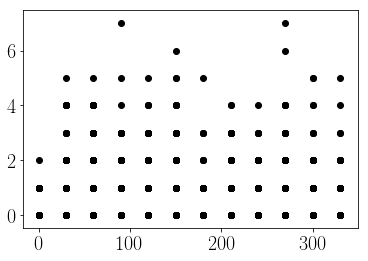

In [79]:
plot_tuning_curve(10)

In [77]:
def plot_responses_2d(neuron1, neuron2, stim=None):    
    if stim is None:
        cmap = plt.get_cmap('plasma')
        stims = np.linspace(0, 330, 12)

        for stim_idx, stim in enumerate(stims):
            plt.scatter(spike_counts[neuron1, stim_idx, :], spike_counts[neuron2, stim_idx, :], color=cmap(int(stim_idx/n_stimuli * 255)))
    else:
        plt.scatter(spike_counts[neuron1, stim, :], spike_counts[neuron2, stim, :])

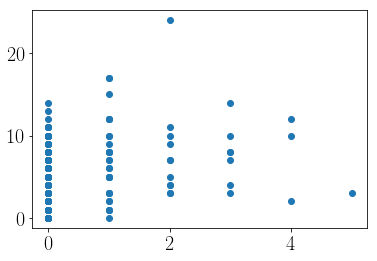

In [78]:
plot_responses_2d(10, 40, stim=4)

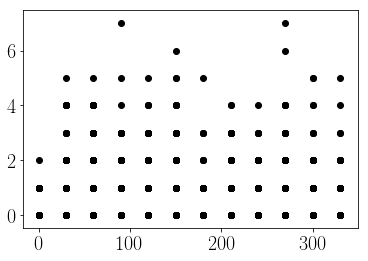

In [62]:
plot_tuning_curve(10)

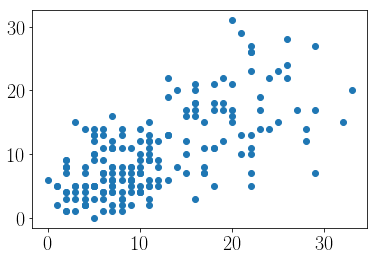

In [53]:
plot_responses(17, 90)

In [51]:
np.linspace(0, 330, 12)

array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330.])